In [2]:
import h5py
import numpy as np
import keras
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import gc
from sklearn import model_selection

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip "/content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/earth_data.zip" -d "./"

Archive:  /content/gdrive/My Drive/DeepLearning_MSC/Assignment2/datasets/earth_data.zip
  inflating: ./earth_data.h5         


In [ ]:
!ls

earth_data.h5  gdrive  sample_data


In [ ]:
def loadDataH5():
    with h5py.File('earth_data.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
        print (trainX.shape,trainY.shape)
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY

In [ ]:
def build_model(width, height, depth, classes, modelConfig = 1, max_layers = 4):
    model = tf.keras.Sequential()
    inputShape = (height, width, depth)

    # Base line Model
    if modelConfig == 1:
        model.add(keras.layers.Conv2D(16, (3, 3), padding="same", input_shape = inputShape, activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
        model.add(keras.layers.Flatten())

        model.add(keras.layers.Dense(4096, activation="relu"))
        model.add(keras.layers.Dense(9, activation="softmax"))

    # Model configuration 1
    if modelConfig == 2:
        model.add(keras.layers.Conv2D(16, (3, 3), padding="same", input_shape = inputShape, activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Flatten())

        model.add(keras.layers.Dense(4096, activation="relu"))
        model.add(keras.layers.Dense(9, activation="softmax"))

    # Model configuration 2
    if modelConfig == 3:
        model.add(keras.layers.Conv2D(16, (3, 3), padding="same", input_shape = inputShape, activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Flatten())

        model.add(keras.layers.Dense(4096, activation="relu"))
        model.add(keras.layers.Dense(9, activation="softmax"))

    # Model configuration 3
    if modelConfig == 4:
        model.add(keras.layers.Conv2D(16, (3, 3), padding="same", input_shape = inputShape, activation="relu"))
        model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Flatten())

        model.add(keras.layers.Dense(4096, activation="relu"))
        model.add(keras.layers.Dense(9, activation="softmax"))

    # Model configuration 4
    if modelConfig == 5:
        model.add(keras.layers.Conv2D(16, (3, 3), padding="same", input_shape = inputShape, activation="relu"))
        model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Conv2D(128, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.Conv2D(256, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Flatten())
        
        model.add(keras.layers.Dense(4096, activation="relu"))
        model.add(keras.layers.Dense(9, activation="softmax"))

    # Shallow VGGNet (for ensemble learning)
    if modelConfig == 6:
        model.add(keras.layers.Conv2D(32, (3, 3), padding="same", input_shape = inputShape, activation="relu"))
        model.add(keras.layers.Conv2D(32, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.Conv2D(64, (3, 3), padding="same", activation="relu"))
        model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

        model.add(keras.layers.Flatten())
        
        model.add(keras.layers.Dense(512, activation="relu"))
        model.add(keras.layers.Dense(classes, activation="softmax"))

    # ensemble using K-fold split
    if modelConfig == 7:
        initial_no_of_filters = 16

        print("\n")

        model.add(keras.layers.Conv2D(initial_no_of_filters, (3, 3), padding="same", input_shape = inputShape, activation="relu"))

        for i in range(1, max_layers+1):
            no_of_conv_blocks = np.random.randint(2, max_layers+1)
            for j in range(2, no_of_conv_blocks+1):
                model.add(keras.layers.Conv2D(initial_no_of_filters, (3, 3), padding="same", activation="relu"))
            model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
            initial_no_of_filters = 2**(max_layers + i)

        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(512, activation="relu"))
        model.add(keras.layers.Dense(classes, activation="softmax"))

    return model

In [1]:
def train_model(model, trainX, trainY, valX, valY, learning_rate = 0.001):
    print(" Memory released: ", gc.collect())
    print("\n")
    opt = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(loss="meansquared_error", optimizer=opt, metrics=['accuracy'])
    early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
    
    print(model.summary())

    history = model.fit(x = trainX, y = trainY, batch_size=128, validation_data=(valX, valY), epochs=100, callbacks = early_stopping)
    return history, model

In [ ]:
def ensemble_learn(trainX, trainY, valX, valY, n_learners = 10, lr = 0.001):
    n_estimators = n_learners
    cnn_ensemble = list()
    ensemble_history = list()

    print("Building {} shallow vggnet sequentially".format(n_estimators))

    for i in range(n_estimators):
        model = build_model(64, 64, 3, 9, modelConfig = 6)

        print("\nShallow VGGNet {} is being trained".format(i+1))
        history, model = train_model(model, trainX, trainY, valX, valY, learning_rate = lr)
        cnn_ensemble.append(model)
        ensemble_history.append(history)
    
    return cnn_ensemble, ensemble_history

In [ ]:
def kfold_ensemble_learn(trainX, trainY, valX, valY, lr = 0.001, return_base_learners = False):
    # variables to store the models and the results for each model
    cnn_ensemble_models = list()
    cnn_ensemble_results = list()

    # Instantiating KFold object
    kf = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 195877)
    fold_num = 0    # Just to keep the count

    # Iterating over the Kfold split
    for train_indices, val_indices in kf.split(trainX , trainY):
        fold_num += 1 
        
        # Creating independent learner
        model = build_model(64, 64, 3, 9, modelConfig = 7)
        
        print("Training model number {}".format(fold_num))
        history, model = train_model(model, trainX[train_indices], trainY[train_indices], trainX[val_indices], trainY[val_indices], learning_rate = lr)
        
        plot([history])

        model_val_predictions = ensemble_predict([model], valX)
        cnn_ensemble_results.append(accuracy_score(valY, model_val_predictions))
        cnn_ensemble_models.append(model)
        
        print("Validation_accuracy on test set from model {} = {}: ".format(fold_num, cnn_ensemble_results[-1]))
        print("\nConfusion matrix: ", confusion_matrix(valY, model_val_predictions))

        if len(cnn_ensemble_models) > 1:
            print("Incremental model performance on Test set: ")
            incremental_model_val_predictions = ensemble_predict(cnn_ensemble_models, valX)
            print("accuracy with {} models is = {} ".format(fold_num, accuracy_score(valY, incremental_model_val_predictions)))
            print("\nConfusion matrix: ", confusion_matrix(valY, incremental_model_val_predictions))

    if return_base_learners:
        return cnn_ensemble_models


In [ ]:
def ensemble_predict(cnnEnsemble, valX):
    print("memory released: ", gc.collect())
    ensemble_val_predictions = list()
    
    for i in range(len(cnnEnsemble)):
        ensemble_val_predictions.append(cnnEnsemble[i].predict(valX))

    return np.argmax(np.mean(ensemble_val_predictions, axis = 0), axis = 1)

In [ ]:
def build_and_train(trainX, trainY, valX, valY):
    
    # Base line model calling it as config1
    print("Training a Base Line model")
    modelConfig1 = build_model(64, 64, 3, 9)
    config1ModelHistory, modelConfig1 = train_model(modelConfig1, trainX, trainY, valX, valY)

    # Config2
    print("\nTraining 1st config")
    modelConfig2 = build_model(64, 64, 3, 9, modelConfig = 2)
    config2ModelHistory, modelConfig2 = train_model(modelConfig2, trainX, trainY, valX, valY)

    # Config3
    print("\nTraining 2nd config")
    modelConfig3 = build_model(64, 64, 3, 9, modelConfig = 3)
    config3ModelHistory, modelConfig3 = train_model(modelConfig3, trainX, trainY, valX, valY)

    # Config4
    print("\nTraining 3rd config")
    modelConfig4 = build_model(64, 64, 3, 9, modelConfig = 4)
    config4ModelHistory, modelConfig4 = train_model(modelConfig4, trainX, trainY, valX, valY)

    # Config5
    print("\nTraining 4th config")
    modelConfig5 = build_model(64, 64, 3, 9, modelConfig = 5)
    config5ModelHistory, modelConfig5 = train_model(modelConfig5, trainX, trainY, valX, valY)

    return config1ModelHistory, config2ModelHistory, config3ModelHistory, config4ModelHistory, config5ModelHistory, modelConfig1, modelConfig2, modelConfig3, modelConfig4, modelConfig5


In [ ]:
def plot(history):
    for i, hist in enumerate(history):
        plt.plot(hist.history['loss'])
        plt.plot(hist.history['val_loss'])
        
        plt.title("Model" + "_" + str(i) + "_loss")
        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.legend(['train_loss', 'val_loss'], loc = 'upper right')
        plt.show()

        print("\n")

        plt.plot(hist.history['accuracy'])
        plt.plot(hist.history['val_accuracy'])
        plt.title("Model" + "_" + str(i) + "_accuracy")
        plt.xlabel("epochs")
        plt.ylabel("accuracy")
        plt.legend(['train_acc', 'val_acc'], loc = 'lower right')
        plt.show()

        print("\n\n")

In [ ]:
def main():
    # Read the data
    trainX, trainY, valX, valY = loadDataH5()
    print(np.unique(trainY, return_counts=True))    # Get the counts for each class

    config1ModelHistory, config2ModelHistory, config3ModelHistory, config4ModelHistory, config5ModelHistory, modelConfig1, modelConfig2, modelConfig3, modelConfig4, modelConfig5 = build_and_train(trainX, trainY, valX, valY)

    print("Plotting the loss/accuracy curves: ")
    plot([config1ModelHistory, config2ModelHistory, config3ModelHistory, config4ModelHistory, config5ModelHistory])

    return modelConfig1, modelConfig2, modelConfig3, modelConfig4, modelConfig5

# Baseline and 4 different basic configurations

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([2400, 2400, 2400, 2000, 2000, 1600, 2000, 2400, 2000]))
Training a Base Line model
 Memory released:  351


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              67112960  
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 36873     
Total params: 67,150,281
Trainable params: 67,15

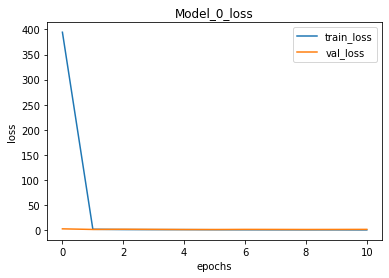

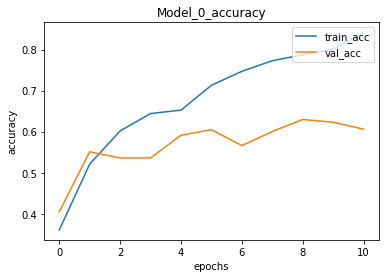

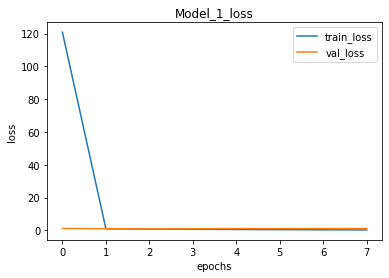

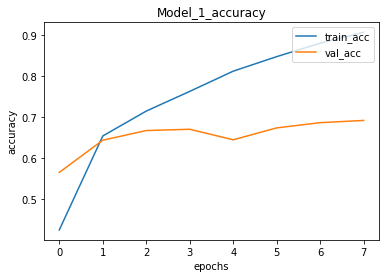

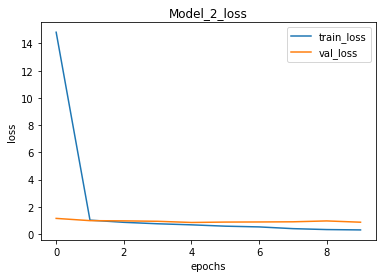

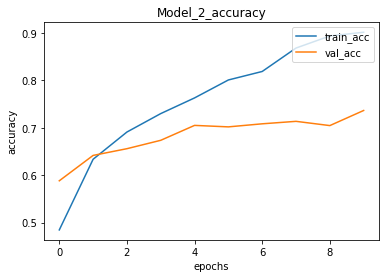

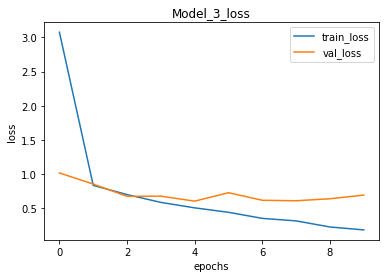

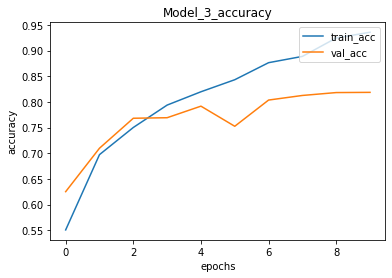

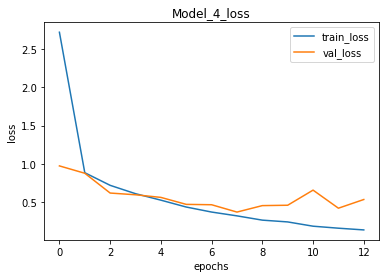

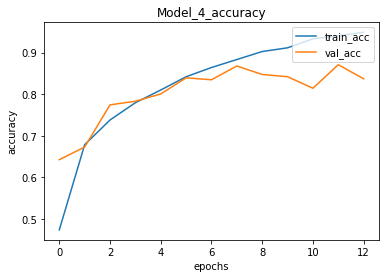

In [ ]:
modelConfig1, modelConfig2, modelConfig3, modelConfig4, modelConfig5 = main()

# Data Augmentation set1

In [ ]:
trainX, trainY, valX, valY = loadDataH5()
print(np.unique(trainY, return_counts=True))

batchSize = 128
numEpochs = 100
learningRate = 0.001

opt = keras.optimizers.Adam(learning_rate=learningRate)

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([2400, 2400, 2400, 2000, 2000, 1600, 2000, 2400, 2000]))


## First deep model, model configuration 4

In [ ]:
# In first section we tried 5 different models (one base line and 4 different configurations with increasing model complexity)
# For Data augmentation, we are selecting last two model configurations which are the deepest in our case

modelConfig4Aug = build_model(64, 64, 3, 9, modelConfig = 4)

modelConfig4Aug.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])


trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
                     shear_range = 0.2,
                     zoom_range = 0.2,
                     rotation_range = 30,
                     horizontal_flip = True)

train_generator = trainDataGenerator.flow(trainX , trainY , batch_size = batchSize)

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

HistoryModelConfig4Aug = modelConfig4Aug.fit(train_generator, validation_data = (valX, valY), steps_per_epoch = len(trainY)//batchSize, epochs = numEpochs, callbacks=early_stopping)

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([2400, 2400, 2400, 2000, 2000, 1600, 2000, 2400, 2000]))
Epoch 1/100
150/150 [==============================] - 26s 148ms/step - loss: 8.6051 - accuracy: 0.3709 - val_loss: 1.1161 - val_accuracy: 0.5842
Epoch 2/100
150/150 [==============================] - 22s 147ms/step - loss: 0.9695 - accuracy: 0.6453 - val_loss: 0.8320 - val_accuracy: 0.6935
Epoch 3/100
150/150 [==============================] - 22s 148ms/step - loss: 0.8321 - accuracy: 0.6975 - val_loss: 0.7883 - val_accuracy: 0.7171
Epoch 4/100
150/150 [==============================] - 22s 148ms/step - loss: 0.7463 - accuracy: 0.7281 - val_loss: 0.7254 - val_accuracy: 0.7471
Epoch 5/100
150/150 [==============================] - 22s 147ms/step - loss: 0.6958 - accuracy: 0.7492 - val_loss: 0.6608 - val_accuracy: 0.7604
Epoch 6/100
150/150 [==============================] - 22s 149ms/step - loss: 0.6706 - accuracy: 0.7577 - val_loss: 

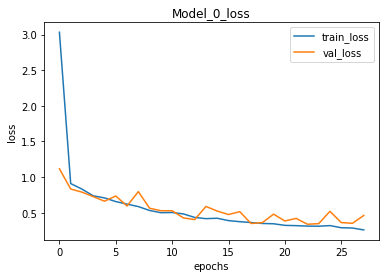

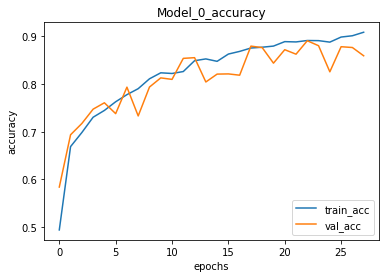

In [ ]:
plot([HistoryModelConfig4Aug])

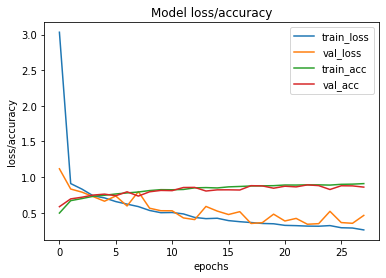

In [ ]:
plt.plot(HistoryModelConfig4Aug.history['loss'])
plt.plot(HistoryModelConfig4Aug.history['val_loss'])

plt.plot(HistoryModelConfig4Aug.history['accuracy'])
plt.plot(HistoryModelConfig4Aug.history['val_accuracy'])

plt.title("Model loss/accuracy")
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.legend(['train_loss', 'val_loss', 'train_acc', 'val_acc'], loc = 'upper right')
plt.show()

## Second deep model, model configuration 5

In [ ]:
gc.collect()

366

In [ ]:
modelConfig5Aug = build_model(64, 64, 3, 9, modelConfig = 5)
print(modelConfig5Aug.summary())

modelConfig5Aug.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])


trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
                     shear_range = 0.2,
                     zoom_range = 0.2,
                     rotation_range = 30,
                     horizontal_flip = True)

train_generator = trainDataGenerator.flow(trainX , trainY , batch_size = batchSize)

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

HistoryModelConfig5Aug = modelConfig5Aug.fit(train_generator, validation_data = (valX, valY), steps_per_epoch = len(trainY)//batchSize, epochs = numEpochs, callbacks=early_stopping)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 128)      

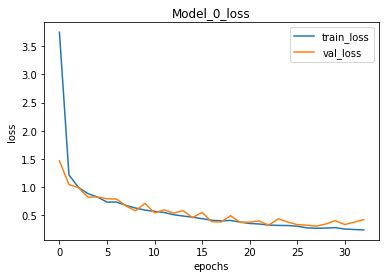

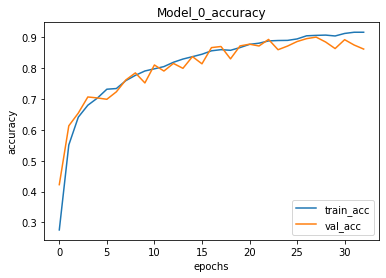

In [ ]:
plot([HistoryModelConfig5Aug])

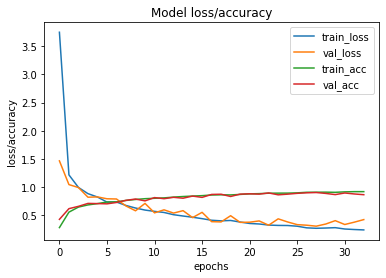

In [ ]:
plt.plot(HistoryModelConfig5Aug.history['loss'])
plt.plot(HistoryModelConfig5Aug.history['val_loss'])

plt.plot(HistoryModelConfig5Aug.history['accuracy'])
plt.plot(HistoryModelConfig5Aug.history['val_accuracy'])

plt.title("Model loss/accuracy")
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.legend(['train_loss', 'val_loss', 'train_acc', 'val_acc'], loc = 'upper right')
plt.show()

# Data Augmentation set2

In [ ]:
trainX, trainY, valX, valY = loadDataH5()
print(np.unique(trainY, return_counts=True))

batchSize = 128
numEpochs = 100
learningRate = 0.001

opt = keras.optimizers.Adam(learning_rate=learningRate)

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([2400, 2400, 2400, 2000, 2000, 1600, 2000, 2400, 2000]))


## First deep model, model configuration 4

In [ ]:
# In first section we tried 5 different models (one base line and 4 different configurations with increasing model complexity)
# For Data augmentation, we are selecting last two model configurations which are the deepest in our case

modelConfig4Aug = build_model(64, 64, 3, 9, modelConfig = 4)

modelConfig4Aug.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])


trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
                     shear_range = 0.3,
                     zoom_range = 0.3,
                     rotation_range = 30,
                     vertical_flip = True,
                     width_shift_range = 2,
                     height_shift_range = 2,
                     horizontal_flip = True)

train_generator = trainDataGenerator.flow(trainX , trainY , batch_size = batchSize)

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

HistoryModelConfig4Aug = modelConfig4Aug.fit(train_generator, validation_data = (valX, valY), steps_per_epoch = len(trainY)//batchSize, epochs = numEpochs, callbacks=early_stopping)

Epoch 1/100
150/150 [==============================] - 27s 154ms/step - loss: 6.2235 - accuracy: 0.3266 - val_loss: 1.2960 - val_accuracy: 0.5252
Epoch 2/100
150/150 [==============================] - 23s 151ms/step - loss: 1.0542 - accuracy: 0.6145 - val_loss: 1.0420 - val_accuracy: 0.6331
Epoch 3/100
150/150 [==============================] - 22s 150ms/step - loss: 0.8840 - accuracy: 0.6744 - val_loss: 0.8084 - val_accuracy: 0.6990
Epoch 4/100
150/150 [==============================] - 23s 151ms/step - loss: 0.7853 - accuracy: 0.7137 - val_loss: 0.7374 - val_accuracy: 0.7292
Epoch 5/100
150/150 [==============================] - 23s 153ms/step - loss: 0.7334 - accuracy: 0.7306 - val_loss: 0.7019 - val_accuracy: 0.7333
Epoch 6/100
150/150 [==============================] - 23s 152ms/step - loss: 0.6858 - accuracy: 0.7479 - val_loss: 0.6613 - val_accuracy: 0.7640
Epoch 7/100
150/150 [==============================] - 23s 152ms/step - loss: 0.6505 - accuracy: 0.7599 - val_loss: 0.7485 -

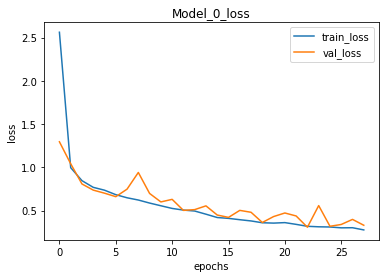

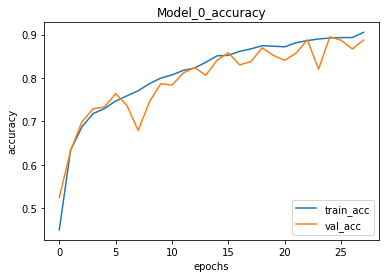

In [ ]:
plot([HistoryModelConfig4Aug])

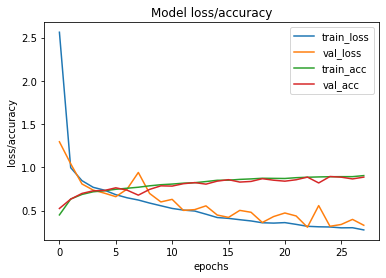

In [ ]:
plt.plot(HistoryModelConfig4Aug.history['loss'])
plt.plot(HistoryModelConfig4Aug.history['val_loss'])

plt.plot(HistoryModelConfig4Aug.history['accuracy'])
plt.plot(HistoryModelConfig4Aug.history['val_accuracy'])

plt.title("Model loss/accuracy")
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.legend(['train_loss', 'val_loss', 'train_acc', 'val_acc'], loc = 'upper right')
plt.show()

## Second deep model, model configuration 5

In [ ]:
gc.collect()

9282

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
modelConfig5Aug = build_model(64, 64, 3, 9, modelConfig = 5)
print(modelConfig5Aug.summary())

modelConfig5Aug.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])


trainDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator(
                     shear_range = 0.3,
                     zoom_range = 0.3,
                     rotation_range = 30,
                     vertical_flip = True,
                     width_shift_range = 2,
                     height_shift_range = 2,
                     horizontal_flip = True)

train_generator = trainDataGenerator.flow(trainX , trainY , batch_size = batchSize)

early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

HistoryModelConfig5Aug = modelConfig5Aug.fit(train_generator, validation_data = (valX, valY), steps_per_epoch = len(trainY)//batchSize, epochs = numEpochs, callbacks=early_stopping)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 128)      

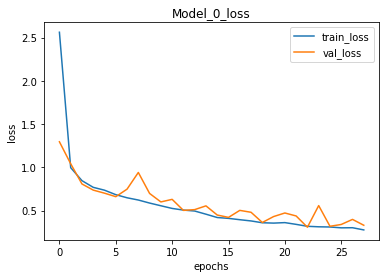

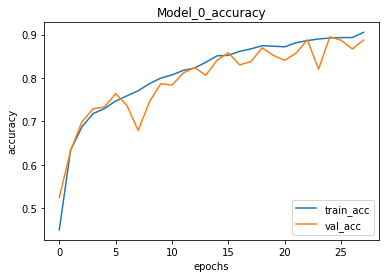

In [ ]:
plot([HistoryModelConfig4Aug])

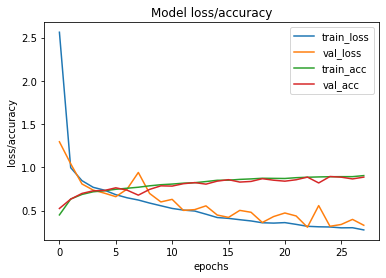

In [ ]:
plt.plot(HistoryModelConfig4Aug.history['loss'])
plt.plot(HistoryModelConfig4Aug.history['val_loss'])

plt.plot(HistoryModelConfig4Aug.history['accuracy'])
plt.plot(HistoryModelConfig4Aug.history['val_accuracy'])

plt.title("Model loss/accuracy")
plt.xlabel("epochs")
plt.ylabel("loss/accuracy")
plt.legend(['train_loss', 'val_loss', 'train_acc', 'val_acc'], loc = 'upper right')
plt.show()

# CNN ENSEMBLE

In [ ]:
trainX, trainY, valX, valY = loadDataH5()
n_learners = 10
print(np.unique(trainY, return_counts=True))

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([2400, 2400, 2400, 2000, 2000, 1600, 2000, 2400, 2000]))


In [ ]:
gc.collect()

2711

Building 10 shallow vggnet sequentially

Shallow VGGNet 1 is being trained
 Memory released:  456


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 64)        0         
___________________

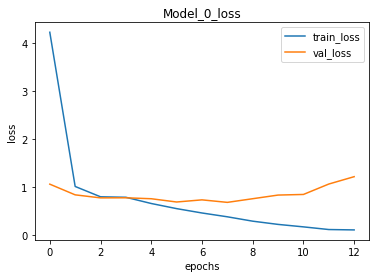

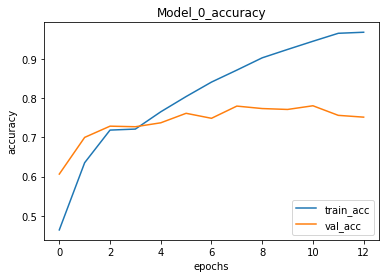

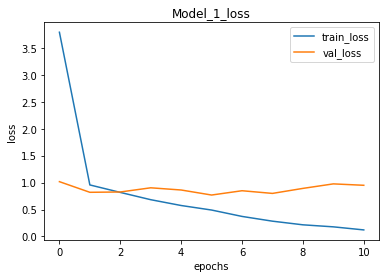

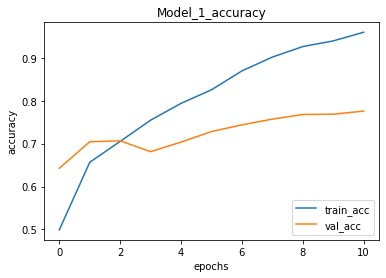

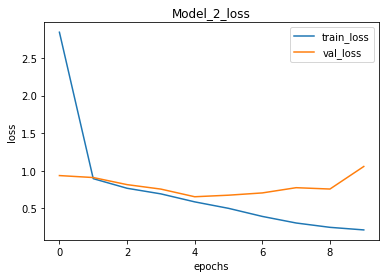

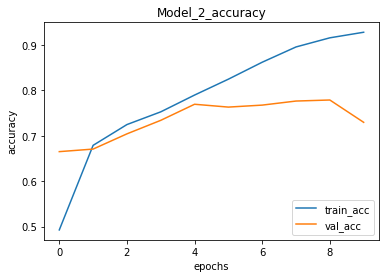

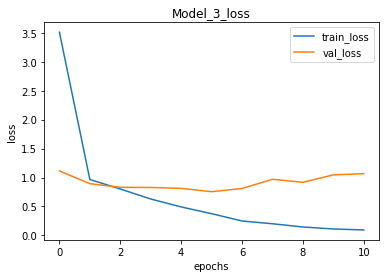

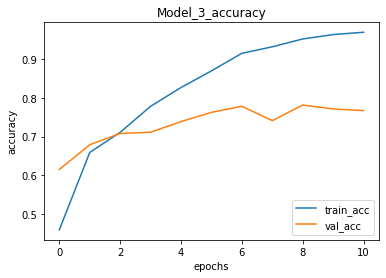

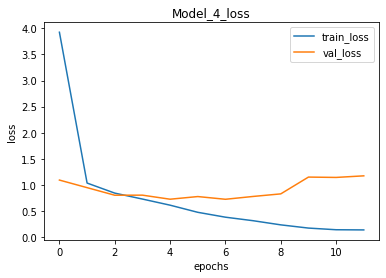

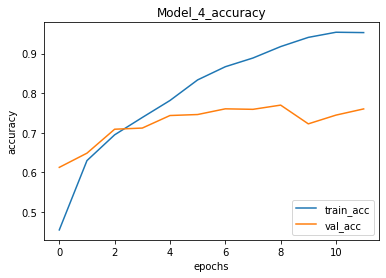

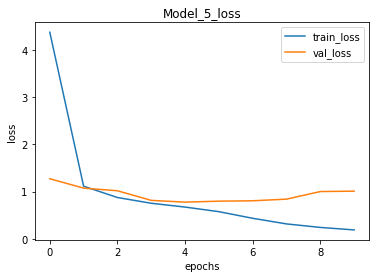

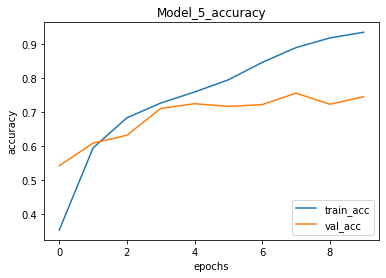

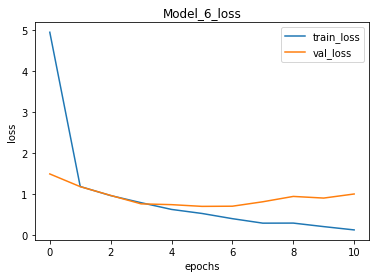

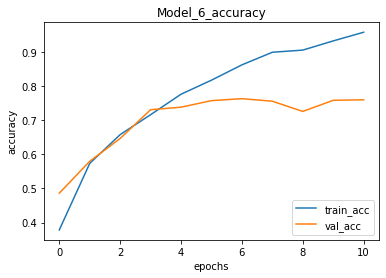

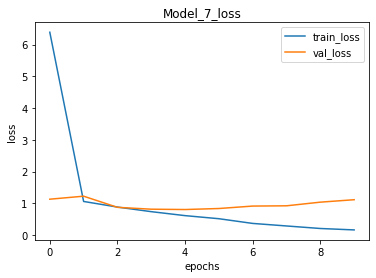

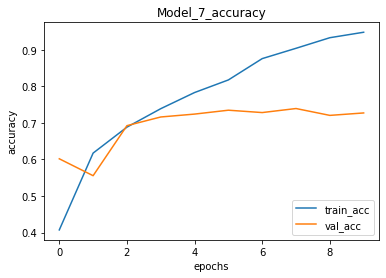

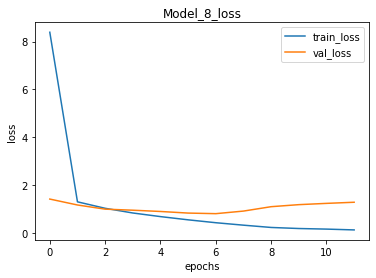

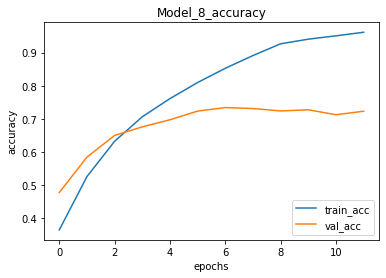

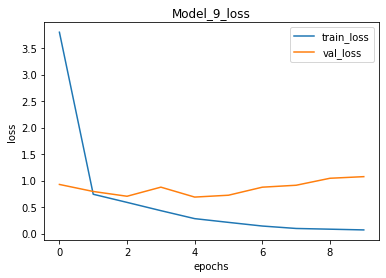

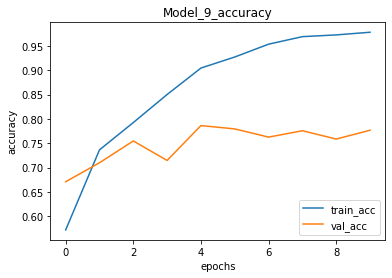




memory released:  74321
Ensemble accuracy =  0.8285416666666666


In [ ]:
cnnEnsemble, historyEnsemble = ensemble_learn(trainX, trainY, valX, valY, n_learners, lr = 0.001)
plot(historyEnsemble)

ensemble_val_predictions = ensemble_predict(cnnEnsemble, valX)
print("Ensemble accuracy = ", accuracy_score(valY, ensemble_val_predictions))

# KFOLD ENSEMBLE

In [ ]:
trainX, trainY, valX, valY = loadDataH5()
print(np.unique(trainY, return_counts=True))

(19200, 64, 64, 3) (19200,)
(4800, 64, 64, 3) (4800,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([2400, 2400, 2400, 2000, 2000, 1600, 2000, 2400, 2000]))




Training model number 1
 Memory released:  699


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_p

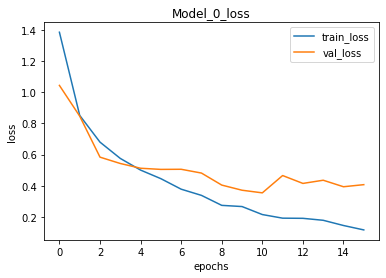

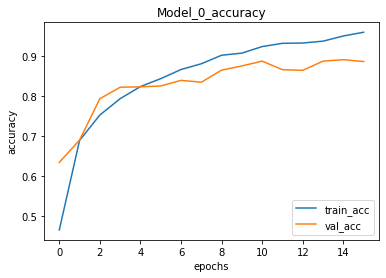




memory released:  7085
Validation_accuracy on test set from model 1 = 0.8879166666666667: 

Confusion matrix:  [[548   4   8  11   0  12  10   0   7]
 [  0 592   7   0   0   1   0   0   0]
 [  0   5 522  18   0   8  36   8   3]
 [  6   1   9 442   8   4  16   3  11]
 [  0   0   8  41 422   0   6  22   1]
 [ 10  19   9   1   0 355   2   0   4]
 [  8   0  55  27   1   7 402   0   0]
 [  0   0  23   4   3   0   0 570   0]
 [ 22   7   7  41   0  12   2   0 409]]


Training model number 2
 Memory released:  1237


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 16)        2320      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 64, 16)        2320     

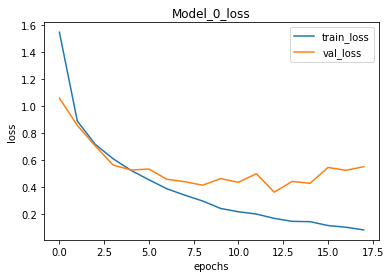

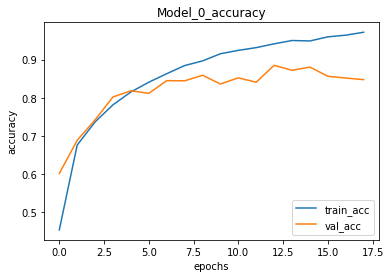




memory released:  7137
Validation_accuracy on test set from model 2 = 0.8922916666666667: 

Confusion matrix:  [[566   4   2   2   0  11   5   0  10]
 [  0 589   8   1   0   1   0   1   0]
 [  6   5 502   9   6  14  45   7   6]
 [ 13   2   6 399  15   5  21   4  35]
 [  0   0   1  11 482   0   1   5   0]
 [ 14   2   7   1   0 368   4   0   4]
 [ 26   0  35  18   9   8 398   0   6]
 [  0   1   7   5   8   0   2 577   0]
 [ 32   6   7  30   1  20   2   0 402]]
Incremental model performance on Test set: 
memory released:  3
accuracy with 2 models is = 0.9202083333333333 

Confusion matrix:  [[571   4   2   3   0  10   4   0   6]
 [  0 591   8   0   0   1   0   0   0]
 [  1   3 529  11   3  11  31   7   4]
 [  9   1   5 435  10   4  15   4  17]
 [  0   0   1  13 478   0   1   7   0]
 [  9   2   6   0   0 378   1   0   4]
 [ 15   0  41  14   5   5 418   0   2]
 [  0   1   4   2   5   0   1 587   0]
 [ 19   5   4  27   0  12   3   0 430]]


Training model number 3
 Memory released:  2467


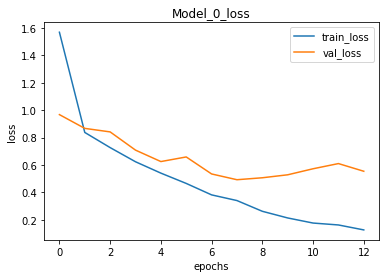

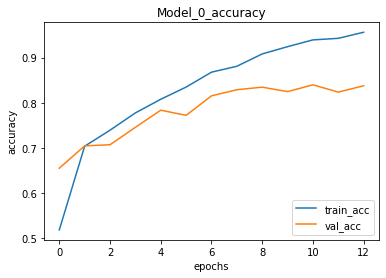




memory released:  6324
Validation_accuracy on test set from model 3 = 0.8447916666666667: 

Confusion matrix:  [[507   2  19  16   0  17  24   0  15]
 [  0 579  10   0   0   3   1   2   5]
 [  0   5 494  23  17   6  40  15   0]
 [  6   2   9 375  35   4  24   6  39]
 [  0   0   2  11 482   0   2   3   0]
 [  7  15  17  13   1 304  27   0  16]
 [  5   0  81  46  13   0 352   1   2]
 [  0   0   2   3  28   0   0 567   0]
 [ 12   3  19  48   3  16   4   0 395]]
Incremental model performance on Test set: 
memory released:  659
accuracy with 3 models is = 0.9147916666666667 

Confusion matrix:  [[560   4   6   6   0  12   5   0   7]
 [  0 588   8   0   0   1   0   2   1]
 [  0   5 531   6   8   9  31   8   2]
 [  6   1   8 430  15   3  17   3  17]
 [  0   0   0  13 484   0   0   3   0]
 [  6   4   7   1   0 373   4   0   5]
 [ 11   0  48  20   8   4 408   0   1]
 [  0   0   4   1   7   0   1 587   0]
 [ 18   5   6  30   1   9   1   0 430]]


Training model number 4
 Memory released:  263

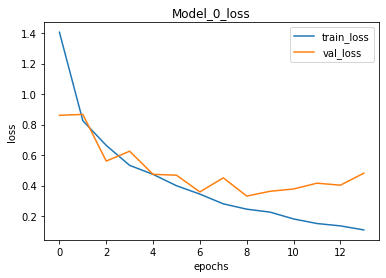

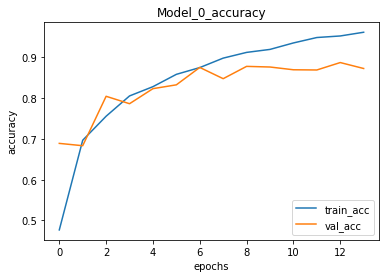




memory released:  6963
Validation_accuracy on test set from model 4 = 0.876875: 

Confusion matrix:  [[561   3   5   4   0   8  10   0   9]
 [  0 595   3   0   0   0   0   1   1]
 [  2   7 559   4   3   3  16   5   1]
 [ 11   0  39 385   4   2  22   4  33]
 [  0   0  19  27 438   0   1  14   1]
 [ 17  11  15   3   0 337   0   0  17]
 [ 17   0 109  14   5   8 344   0   3]
 [  0   0  27   2   3   0   0 568   0]
 [ 28   2  16  22   0   7   3   0 422]]
Incremental model performance on Test set: 
memory released:  659
accuracy with 4 models is = 0.9202083333333333 

Confusion matrix:  [[565   3   5   5   0  10   4   0   8]
 [  0 591   8   0   0   0   0   1   0]
 [  0   7 543   4   6   6  25   8   1]
 [  7   1   8 434  10   3  16   5  16]
 [  0   0   2  15 479   0   1   3   0]
 [  8   5   7   0   0 375   2   0   3]
 [ 13   0  54  15   8   4 405   0   1]
 [  0   0   4   1   5   0   0 590   0]
 [ 15   4   7  30   0   6   3   0 435]]


Training model number 5
 Memory released:  3435


Model:

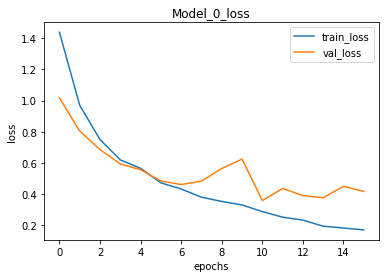

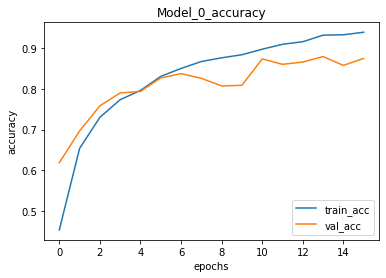




memory released:  7079
Validation_accuracy on test set from model 5 = 0.8835416666666667: 

Confusion matrix:  [[543   6   7   4   0  14  16   0  10]
 [  2 582  11   0   0   4   0   0   1]
 [  3   6 505  12   8   7  47  11   1]
 [  3   0   3 449  18   1  11   1  14]
 [  0   0   2   9 485   0   2   2   0]
 [ 16   9  14   5   0 325  10   0  21]
 [  7   0  49  21   4   1 415   0   3]
 [  0   0   9   5  17   0   0 569   0]
 [ 27   8   7  54   1  30   5   0 368]]
Incremental model performance on Test set: 
memory released:  659
accuracy with 5 models is = 0.9252083333333333 

Confusion matrix:  [[567   4   3   4   0  10   6   0   6]
 [  0 590   9   0   0   0   0   0   1]
 [  0   5 541   6   6   6  27   8   1]
 [  3   0   6 447  13   2  14   2  13]
 [  0   0   1   9 487   0   2   1   0]
 [ 10   3  10   0   0 370   5   0   2]
 [  8   0  46  17   5   2 421   0   1]
 [  0   0   5   1   6   0   0 588   0]
 [ 16   4   7  32   0   8   3   0 430]]


Training model number 6
 Memory released:  371

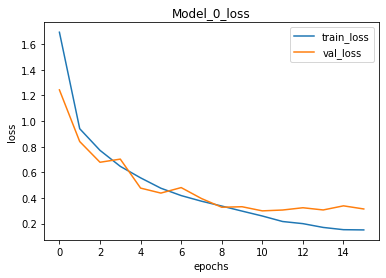

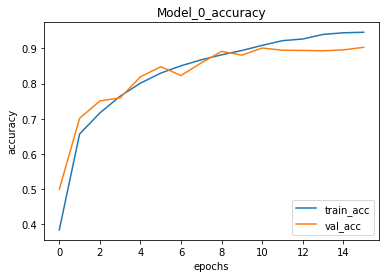




memory released:  7194
Validation_accuracy on test set from model 6 = 0.893125: 

Confusion matrix:  [[556   2   2   3   0  12  20   0   5]
 [  0 582   9   0   0   7   0   2   0]
 [  3  16 466  15  12  15  55  13   5]
 [  8   0   6 432  18   3  20   4   9]
 [  0   0   1   8 483   0   4   3   1]
 [ 21   1   6   1   0 350  12   0   9]
 [  8   0  48   8  10   1 424   0   1]
 [  0   0   3   1  10   0   0 586   0]
 [ 28   0   6  34   2  12  10   0 408]]
Incremental model performance on Test set: 
memory released:  659
accuracy with 6 models is = 0.9285416666666667 

Confusion matrix:  [[569   4   2   4   0  11   6   0   4]
 [  0 590   7   0   0   1   0   1   1]
 [  0   5 538   7   6   6  28   9   1]
 [  3   0   6 450  15   2  12   2  10]
 [  0   0   0  10 486   0   2   2   0]
 [ 12   3   7   0   0 371   4   0   3]
 [ 10   0  43  12   6   2 427   0   0]
 [  0   0   4   1   6   0   0 589   0]
 [ 15   3   6  29   0   6   4   0 437]]


Training model number 7
 Memory released:  303


Model: 

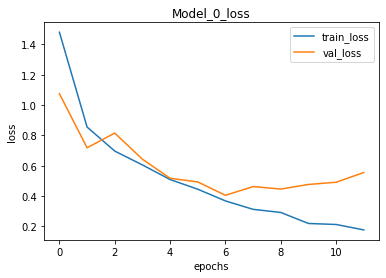

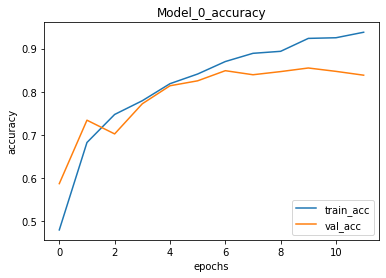




memory released:  6151
Validation_accuracy on test set from model 7 = 0.8591666666666666: 

Confusion matrix:  [[529   2   4   5   0  13  23   0  24]
 [  0 578   2   0   0  15   0   2   3]
 [  0  11 440  16  18  11  69  16  19]
 [ 18   1   3 371  12   2  31   4  58]
 [  0   0   6  13 469   0   4   7   1]
 [ 10   9   9   6   0 337  12   0  17]
 [  9   0  33  26   5   3 415   0   9]
 [  0   0   0  10  12   0   1 577   0]
 [ 19   8   5  41   1  14   4   0 408]]
Incremental model performance on Test set: 
memory released:  659
accuracy with 7 models is = 0.9266666666666666 

Confusion matrix:  [[566   3   2   4   0  11   7   0   7]
 [  0 590   7   0   0   1   0   1   1]
 [  0   6 533   6   7   7  31   9   1]
 [  4   0   6 448  13   1  13   2  13]
 [  0   0   0  10 486   0   2   2   0]
 [ 10   2   7   0   0 373   4   0   4]
 [  8   0  40  15   6   2 429   0   0]
 [  0   0   4   1   6   0   0 589   0]
 [ 16   4   6  29   0   7   4   0 434]]


Training model number 8
 Memory released:  456

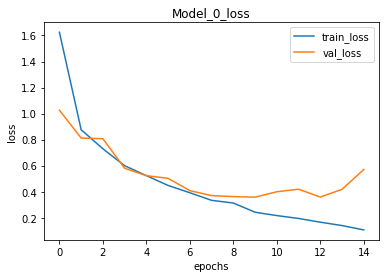

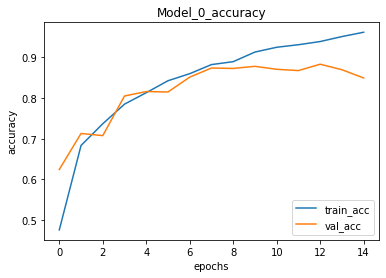




memory released:  6445
Validation_accuracy on test set from model 8 = 0.868125: 

Confusion matrix:  [[506   3  12  12   0  30   4   0  33]
 [  1 591   2   0   0   1   0   2   3]
 [  1  15 503  11   6   6  26  18  14]
 [  8   0  12 369  12  19  15   4  61]
 [  0   0   3  17 462   0   8   6   4]
 [  1   3  12   1   0 371   1   0  11]
 [ 18   0  82  21   6  13 341   0  19]
 [  0   0   0   6  11   0   0 583   0]
 [  8   4   7  20   0  19   1   0 441]]
Incremental model performance on Test set: 
memory released:  3
accuracy with 8 models is = 0.9275 

Confusion matrix:  [[565   3   3   4   0  11   7   0   7]
 [  0 590   6   0   0   1   0   2   1]
 [  0   6 533   7   6   5  30  11   2]
 [  4   0   5 448  11   4  13   3  12]
 [  0   0   0  10 485   0   2   3   0]
 [  8   2   7   0   0 375   4   0   4]
 [  9   0  41  17   6   2 424   0   1]
 [  0   0   2   1   7   0   0 590   0]
 [ 14   3   5  27   0   6   3   0 442]]


Training model number 9
 Memory released:  1143


Model: "sequential_8

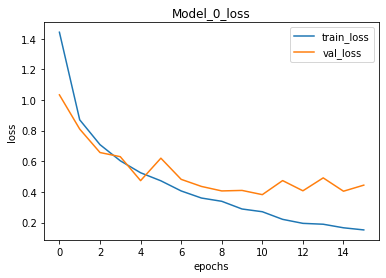

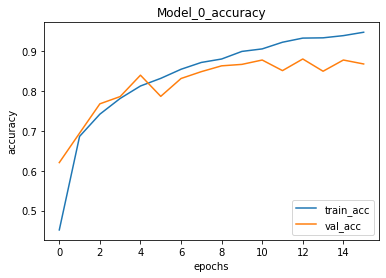




memory released:  7079
Validation_accuracy on test set from model 9 = 0.8833333333333333: 

Confusion matrix:  [[555   3   5   4   0  21   8   0   4]
 [  0 582  16   0   0   1   0   0   1]
 [  4   1 498   9   5  12  62   9   0]
 [ 11   0   7 428  15  12  15   6   6]
 [  0   0   7   9 474   0   5   5   0]
 [  7   4  12   4   0 361   6   0   6]
 [ 17   0  37  17   2   9 418   0   0]
 [  0   0   4   6   9   0   0 581   0]
 [ 33   5  17  50   0  48   4   0 343]]
Incremental model performance on Test set: 
memory released:  659
accuracy with 9 models is = 0.9291666666666667 

Confusion matrix:  [[567   3   3   4   0  13   6   0   4]
 [  0 590   6   0   0   1   0   2   1]
 [  0   6 530   7   7   6  31  11   2]
 [  4   0   6 452   9   3  12   4  10]
 [  0   0   1   9 484   0   3   3   0]
 [  6   1   8   0   0 381   3   0   1]
 [ 10   0  40  16   6   1 426   0   1]
 [  0   0   3   1   7   0   0 589   0]
 [ 14   3   4  27   0   8   3   0 441]]


Training model number 10
 Memory released:  12

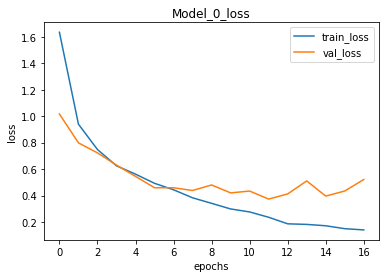

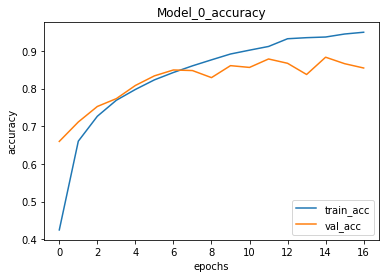




memory released:  7310
Validation_accuracy on test set from model 10 = 0.8904166666666666: 

Confusion matrix:  [[561   5   2   6   0  14   6   0   6]
 [  0 595   4   0   0   0   0   1   0]
 [  6   9 515  12   7   7  21  17   6]
 [ 12   0  15 417   7   2  20   6  21]
 [  0   0   4  11 463   0   1  18   3]
 [  9  20  16   2   0 346   4   0   3]
 [ 22   0  85   9   4   1 376   1   2]
 [  0   0   2   1   2   0   0 595   0]
 [ 21  10  12  32   0  15   4   0 406]]
Incremental model performance on Test set: 
memory released:  659
accuracy with 10 models is = 0.930625 

Confusion matrix:  [[568   3   3   4   0  14   4   0   4]
 [  0 591   5   0   0   1   0   2   1]
 [  0   6 539   5   6   5  26  11   2]
 [  5   0   6 449  10   2  13   4  11]
 [  0   0   1   9 484   0   3   3   0]
 [  5   1   9   1   0 380   3   0   1]
 [ 12   0  41  14   6   1 425   0   1]
 [  0   0   2   1   5   0   0 592   0]
 [ 16   3   4  26   0   9   3   0 439]]


In [ ]:
kfold_ensemble_learn(trainX, trainY, valX, valY, lr = 0.001, return_base_learners = False)